# Team name: Dimsum 
   - Member: Nguyễn Hoàng Huy - DS(3, 5)
   
## Problem: Chocolate Bar


![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

### Context

- Nowadays, Chocolate is very popular in all over the world, with many types of chocolate for us to choose.Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

- In this project we will look through the chocolate dataset, and analyze the data more deeply and extract insights.

- You can find the dataset, [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings).

### Insights

- Some insights i will extract:
    - Where are the best cocoa beans grown?
    - Which countries produce the highest-rated bars?
    - What’s the relationship between cocoa solids percentage and rating?
    
    
### Flavors of Cacao Rating System:
- 5 = Elite (Transcending beyond the ordinary limits)
- 4 = Premium (Superior flavor development, character and style)
- 3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
- 2 = Disappointing (Passable but contains at least one significant flaw)
- 1 = Unpleasant (mostly unpalatable)
    
   
### Data description¶
- **Company** (Ma Name of the company manufacturing the bar.
- **Specific Bean Origin or Bar Name** - The specific geo-region of origin for the bar.
- **REF** - Help us describe this column... What is it?
- **Review Date** - Date of publication of the review.
- **Cocoa Percent** - Cocoa percentage (darkness) of the chocolate bar being reviewed.
- **Company Location** - Manufacturer base country.
- **Rating** - Expert rating for the bar.
- **Bean Type** - The variety (breed) of bean used, if provided.
- **Broad Bean Origin** - The broad geo-region of origin for the bean.

## Explore data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
chocolate = pd.read_csv('chocolate.csv')
chocolate.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [4]:
chocolate.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


## Cleaning Data

#### Cleaning headers

In [5]:
chocolate.head(1)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome


Column names are long, and not follow the standard type name, so we will rename it for later access and compute easily

In [6]:
chocolate.columns = chocolate.columns.str.lower()
chocolate.rename(columns={"company\xa0\n(maker-if known)" : "company_maker",
                          "specific bean origin\nor bar name" : "specific_bean",
                          "review\ndate" : "review_date",
                          "cocoa\npercent" : "cocoa_percent",
                          "company\nlocation" : "company_location",
                          "bean\ntype" : "bean_type",
                          "broad bean\norigin" : "broad_bean"}, inplace=True)

In [7]:
chocolate.head()

,company_maker,specific_bean,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
company_maker       1795 non-null object
specific_bean       1795 non-null object
ref                 1795 non-null int64
review_date         1795 non-null int64
cocoa_percent       1795 non-null object
company_location    1795 non-null object
rating              1795 non-null float64
bean_type           1794 non-null object
broad_bean          1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


There are 1795 data points, but columns **bean_type** and **broad_bean** is missing one value, take a look

In [9]:
chocolate[chocolate["bean_type"].isna()]

,company_maker,specific_bean,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


From poster of this dataset, column bean_type will have value **if provided**, so it is ok with **NaN** value

In [10]:
chocolate[chocolate["broad_bean"].isna()]

,company_maker,specific_bean,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN


In [11]:
#Replace Nan with their specific bean
chocolate['broad_bean'] = chocolate['broad_bean'].fillna(chocolate['specific_bean'])

#### Clean special characters

In [12]:
#remove % and parse "cocoa_percent" to float
chocolate["cocoa_percent"] = chocolate["cocoa_percent"].str.replace("%", "").astype(float)

In [13]:
#Take a look at broad_bean column
chocolate[chocolate["broad_bean"].str.len()==1]["specific_bean"].unique()

array(['Nine', 'Toscano Black', 'Houseblend', 'Nature', 'Organic Dark',
       'One Hundred', 'Blend', 'Lago di Como, Blu', 'Blend No. 1',
       'Philly Blend, 5 plantations', 'Kendari', 'Tarakan', 'Maragda',
       'Sensations Intense', 'Zorzal Reserva, 2015 H., Kerchner', 'Noir',
       'Ilblend', 'Red Vanilla', 'Supremo- SF', 'Dark',
       'Epique, Blend No. 49', 'Coucher du Soleil', 'Lever du Soleil',
       'Onyx', 'Nocturne', 'Complexite', 'Special Maker Reserve',
       'Quetzalcoatl', 'Tsaranta', 'Semisweet', 'Campesino w/ nibs',
       'Trinitario', 'Downtown London', 'Africa meets Latina', 'Amazonas',
       'one hundred', 'Kuruba', 'Orinoco', 'Excellence (US Version)',
       'Cacao Nib Crunch', 'Brooklyn Blend', 'Carre Amer',
       'Carre Grand Noir', 'Noir Infini',
       'Grand Cru Blend No.1, 5 yr. Anniversary Ed', 'Signature Blend',
       'Raw', 'Mid Mountain, 2014', '100 percent', 'Latino', 'Nibby',
       'Extra Dark', 'Bittersweet', 'Wasatch', "Chef's Blend",
   

In [14]:
#number of rows contain "," inside specific_bean column
chocolate[chocolate["specific_bean"].str.contains(",")]["specific_bean"].nunique()

533

In [1]:
#take a look at some special characters
chocolate["broad_bean"].sort_values().unique()

NameError: name 'chocolate' is not defined

##### Clean broad_bean column

In [16]:
def txt_prep(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

In [17]:
chocolate["broad_bean"] = chocolate["broad_bean"].str.replace(".", "").apply(txt_prep)

In [18]:
chocolate["broad_bean"].value_counts().tail(20)

Africa,Carribean,Central America                                 1
Madagascar,Java,Papua New Guinea                                 1
Venezuela,Dominican Republic                                     1
Peru,SMartin,Pangoa,nacional                                     1
Martinique                                                       1
Venezuela,Trinidad                                               1
Dominican Republic,Madagascar                                    1
Guatemala,Dominican Republic,Peru,Madagascar,Papua New Guinea    1
Venezuela,Africa,Brasil,Peru,Mexico                              1
Indonesia,Ghana                                                  1
Madagascar,Ecuador                                               1
Venezuela,Trinidad,Ecuador                                       1
Dominican Republic,Ecuador,Peru                                  1
Ecuador,Costa Rica                                               1
Peru,Dominican Republic                                       

Countries 's name seem to be better than original

In [19]:
#numbers of blend coutries in the same row
(chocolate['broad_bean'].str.count(',') + 1).value_counts()

1    1739
2      38
3      12
5       3
4       3
Name: broad_bean, dtype: int64

##### Clean company_location column

In [20]:
chocolate['company_location'] = chocolate['company_location']\
.str.replace('Amsterdam', 'Holland')\
.str.replace('U.K.', 'England')\
.str.replace('U.S.A.', 'United States')\
.str.replace('Niacragua', 'Nicaragua')\
.str.replace('St. Lucia', 'Saint Lucia')\
.str.replace('Domincan Republic', 'Dominican Republic')
chocolate['company_location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'England', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Holland', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lithuania', 'Madagascar', 'Martinique', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Russia', 'Saint Lucia', 'Sao Tome',
       'Scotland', 'Singapore', 'South Africa', 'South Korea', 'Spain',
       'Suriname', 'Sweden', 'Switzerland', 'United States', 'Venezuela',
       'Vietnam', 'Wales'], dtype=object)

##### Clean company_maker column

In [21]:
#check if there are misspelling or reduction in company name
chocolate["company_maker"].str.lower().nunique() == chocolate["company_maker"].nunique()

True

In [35]:
chocolate["review_date"] = chocolate["review_date"].astype(int)
chocolate.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.985076,0.037791,0.101030
review_date,0.985076,1.000000,0.038177,0.099846
cocoa_percent,0.037791,0.038177,1.000000,-0.164820
rating,0.101030,0.099846,-0.164820,1.000000


### Visualize

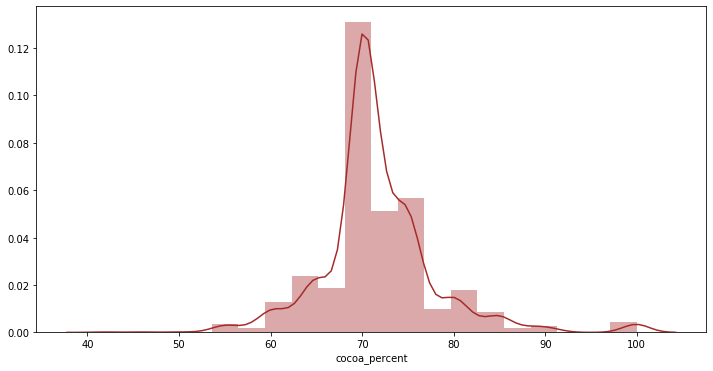

In [23]:
plt.figure(figsize=(12,6))
sns.distplot(chocolate['cocoa_percent'],bins=20,color='Brown')

Cocoa is a key ingredient of any chocolate. Now, lets look at the distribution of cocoa percentage. As expected, we see that the distribution of cocoa percentage in chocolates is normally distributed with a majority of the chocolates having 70% of cocoa, and it almost between at 70% and 76%

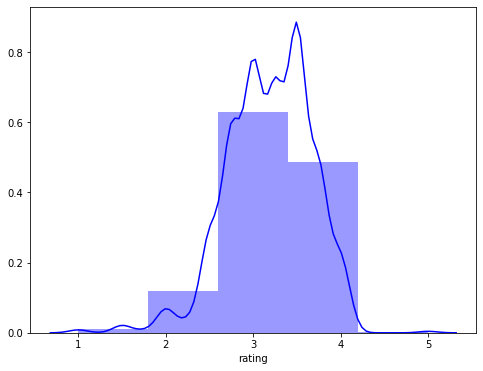

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(chocolate['rating'],bins=5,color='blue')

The rating for 3 and 4 points is very high, compare with 1, 2, 5 point is very low

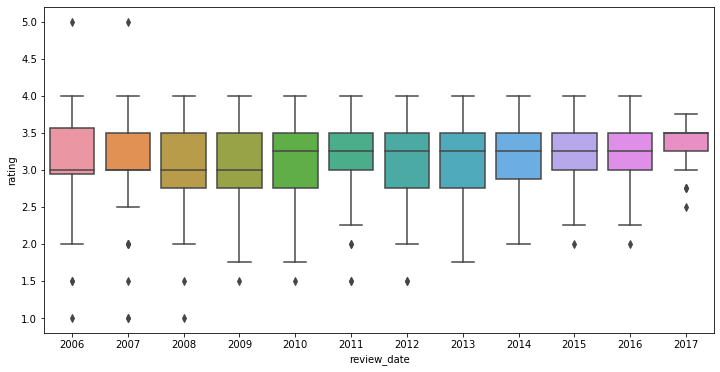

In [25]:
chocolate['review_date'] = chocolate['review_date'].astype(str)

plt.figure(figsize=(12,6))
sns.boxplot(x='review_date', y='rating',data=chocolate)

As it can be seen, the rating standard line from 2006 to 2009 is the same(3.0 points) but from 2010 to 2017 the rating standard line increased a bit (3.25 points). It likes more and more people like to eat chocolate

Text(0.5, 1.0, 'Boxplot, Rating for countries (+blends)')

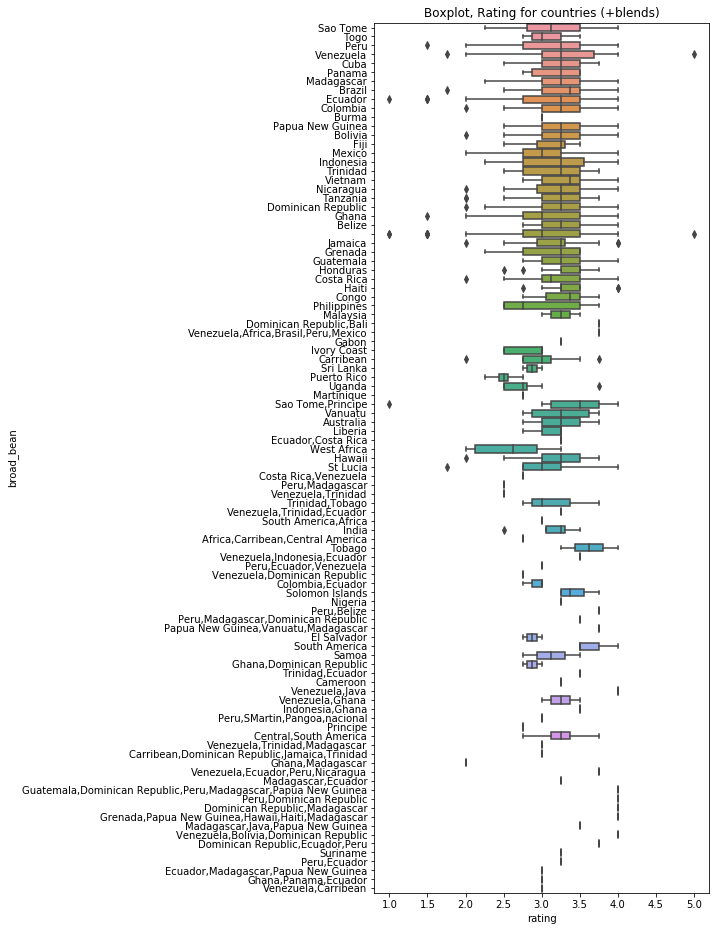

In [26]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=chocolate,
    y='broad_bean',
    x='rating'
)
ax.set_title('Boxplot, Rating for countries (+blends)')

Text(0.5, 1.0, 'Boxplot, Rating for company (+blends)')

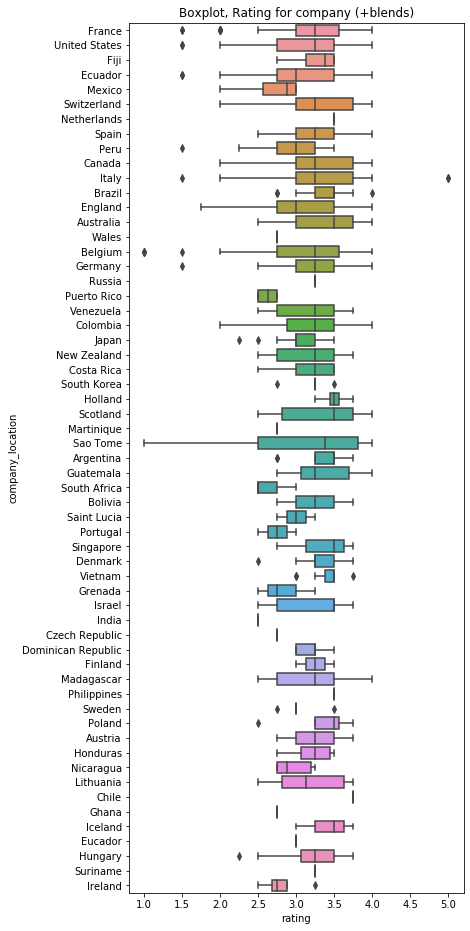

In [27]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=chocolate,
    y='company_location',
    x='rating'
)
ax.set_title('Boxplot, Rating for company (+blends)')

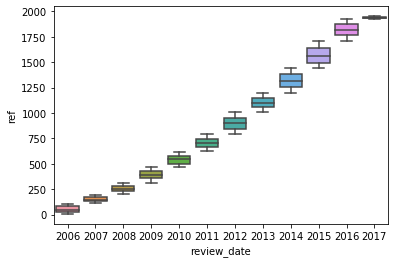

In [28]:
sns.boxplot(
    data=chocolate,
    x='review_date',
    y='ref'
)

REF values incresed through every year from 2006 to 2017, which from 50 to near 2000 points

##### Which countries produce the highest-rated bars?

In [29]:
chocolate["company_location"].value_counts().head(10)

United States    764
France           156
Canada           125
England           96
Italy             63
Ecuador           54
Australia         49
Belgium           40
Switzerland       38
Germany           35
Name: company_location, dtype: int64

c:\users\huy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


Fig 4: 15 Companies with the Highest Chocolate Vendors


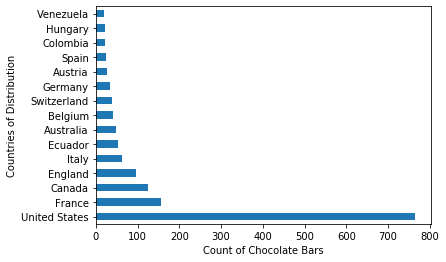

In [30]:
chocolate['company_location'].value_counts().head(15).plot('barh')
plt.xlabel('Count of Chocolate Bars')
plt.ylabel('Countries of Distribution')
print("Fig 4: 15 Companies with the Highest Chocolate Vendors")

US is still the highest country produce chocolate bars, but it's not the country have largest chocolate consumption

#### Where do bean come from ?

In [31]:
chocolate["broad_bean"].nunique()

97

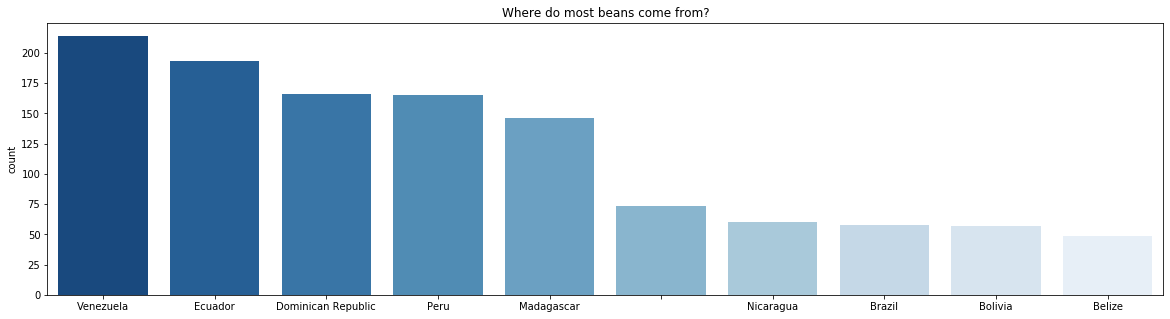

In [32]:
#97 countries

top_counts = chocolate.broad_bean.value_counts().head(10)
sparse_counts = chocolate.broad_bean.value_counts().tail(10)

plt.figure(figsize=(20,5))
sns.barplot(x=top_counts.index, y=top_counts.values, palette="Blues_r")
plt.title("Where do most beans come from?")
plt.ylabel("count");

Venezuela is the highest countries for growning beans, behind is Ecuador, Dominican Republic, Peru and Madagascar. Almost beans come from South America

#### What’s the relationship between cocoa solids percentage and rating?

c:\users\huy\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


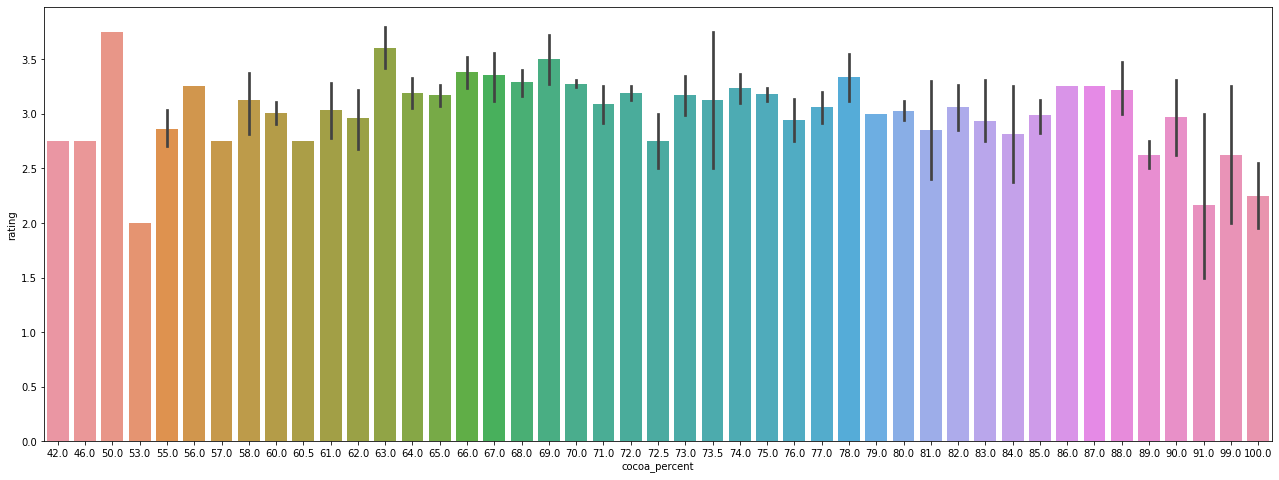

In [33]:
plt.figure(figsize=(22,8))
sns.barplot(x="cocoa_percent", y="rating", data=chocolate)

As it can be seen that with 50% of cocoa, the rating point is the highest with 3.75 point, with (63%, 69%, 73.5%) can be reach to 3.75 point or higher but it not uncertain, it just oscillate around them or lower. Chocolate with 53% or 91% of cacao can is lowest rating point with 2.0 point or lower


### **Dash board for this dataset**, [click here](https://datastudio.google.com/open/1aFacyuqCRb07lqlDBtBjUejLY6rIQLV-)

Thanks for visiting,